# Pytorch drop out, batch

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/머신러닝 딥러닝/유런/train_titanic.csv")
test = pd.read_csv("/content/drive/MyDrive/머신러닝 딥러닝/유런/test_titanic.csv")
submission = pd.read_csv("/content/drive/MyDrive/머신러닝 딥러닝/유런/gender_submission.csv")

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SimpleNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.classifier = nn.Sequential(
            nn.Linear(5, 128),
            ## Batch Normalization between 'Layer' and 'Activation function'
            nn.BatchNorm1d(128),
            nn.ReLU(),
            ## Drop out after 'Activation function'
            nn.Dropout(0.1),
            nn.Linear(128, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

In [ ]:
data_set = pd.concat((train.drop(['Survived'], axis = 1), test), axis = 0)

data_set = data_set.drop(['PassengerId', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis = 1)
data_set = data_set.fillna(data_set.mean())

n_train = train.shape[0]
train_x, test_x = data_set[:n_train], data_set[n_train:]
train_y = train['Survived']

train_x = train_x[train_x.keys()].values
test_x = test_x[test_x.keys()].values
train_y = train_y.values

import torch.optim as optim
from torch.autograd import Variable

simple_nn = SimpleNN()
optimizer = optim.Adam(simple_nn.parameters(), lr=0.01)
error = nn.BCELoss()

batch_size = 99
batch_count = int(len(train_x) / batch_size)

for epoch in range(300):
    train_loss = 0
    num_right = 0
    for i in range(batch_count):
        start = i * batch_size
        end = start + batch_size
        tensor_x = torch.FloatTensor(train_x[start:end])
        tensor_y = torch.FloatTensor(train_y[start:end]).reshape(-1, 1)

        optimizer.zero_grad()
        output = simple_nn(tensor_x)
        loss = error(output, tensor_y)
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * batch_size
        result = [1 if out >= 0.5 else 0 for out in output]
        num_right += np.sum(np.array(result) == train_y[start:end])

    train_loss = train_loss / len(train_x)
    accuracy = num_right / len(train_x)

    if epoch % 25 == 0:
        print('Loss: {} Accuracy: {}% Epoch:{}'.format(train_loss, accuracy, epoch))

print('Training Ended')

Loss: 0.6409203542603387 Accuracy: 0.6632996632996633% Epoch:0
Loss: 0.5347253448433347 Accuracy: 0.7463524130190797% Epoch:25
Loss: 0.47042812241448295 Accuracy: 0.7789001122334456% Epoch:50
Loss: 0.4059135251575046 Accuracy: 0.813692480359147% Epoch:75
Loss: 0.35784675346480477 Accuracy: 0.8395061728395061% Epoch:100
Loss: 0.3264307445949978 Accuracy: 0.856341189674523% Epoch:125
Loss: 0.3177615503470103 Accuracy: 0.8585858585858586% Epoch:150
Loss: 0.3377017229795456 Accuracy: 0.8540965207631874% Epoch:175
Loss: 0.2722444021039539 Accuracy: 0.8810325476992144% Epoch:200
Loss: 0.24141561488310495 Accuracy: 0.8877665544332211% Epoch:225
Loss: 0.266127390993966 Accuracy: 0.8866442199775533% Epoch:250
Loss: 0.22471201750967237 Accuracy: 0.9001122334455668% Epoch:275
Training Ended


In [ ]:
tensor_test_x = torch.FloatTensor(test_x)
with torch.no_grad():
    test_output = simple_nn(tensor_test_x)
    result = np.array([1 if out >= 0.5 else 0 for out in test_output])
    submission = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': result})
    submission.to_csv('submission.csv', index=False)

In [ ]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


# Batch Normalization

In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [ ]:
from torchvision import datasets
import torchvision.transforms as transforms

# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 64

# convert data to torch.FloatTensor
transform = transforms.ToTensor()

# get the training and test datasets
train_data = datasets.MNIST(root='data', train=True,
                            download=True, transform=transform)

test_data = datasets.MNIST(root='data', train=False,
                           download=True, transform=transform)

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
                                           num_workers=num_workers)

test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size,
                                          num_workers=num_workers)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 42402907.16it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 3619340.10it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 13686080.78it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3295939.23it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



## Neural network classes for testing

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class NeuralNet(nn.Module):
    def __init__(self, use_batch_norm, input_size=784, hidden_dim=256, output_size=10):
        """
        Creates a PyTorch net using the given parameters.

        :param use_batch_norm: bool
            Pass True to create a network that uses batch normalization; False otherwise
            Note: this network will not use batch normalization on layers that do not have an
            activation function.
        """
        super(NeuralNet, self).__init__() # init super

        # Default layer sizes
        self.input_size = input_size # (28*28 images)
        self.hidden_dim = hidden_dim
        self.output_size = output_size # (number of classes)
        # Keep track of whether or not this network uses batch normalization.
        self.use_batch_norm = use_batch_norm

        # define hidden linear layers, with optional batch norm on their outputs
        # layers with batch_norm applied have no bias term
        if use_batch_norm:
            self.fc1 = nn.Linear(input_size, hidden_dim*2, bias=False)
            self.batch_norm1 = nn.BatchNorm1d(hidden_dim*2)
        else:
            self.fc1 = nn.Linear(input_size, hidden_dim*2)

        # define *second* hidden linear layers, with optional batch norm on their outputs
        if use_batch_norm:
            self.fc2 = nn.Linear(hidden_dim*2, hidden_dim, bias=False)
            self.batch_norm2 = nn.BatchNorm1d(hidden_dim)
        else:
            self.fc2 = nn.Linear(hidden_dim*2, hidden_dim)

        # third and final, fully-connected layer
        self.fc3 = nn.Linear(hidden_dim, output_size)


    def forward(self, x):
        # flatten image
        x = x.view(-1, 28*28)
        # all hidden layers + optional batch norm + relu activation
        x = self.fc1(x)
        if self.use_batch_norm:
            x = self.batch_norm1(x)
        x = F.relu(x)
        # second layer
        x = self.fc2(x)
        if self.use_batch_norm:
            x = self.batch_norm2(x)
        x = F.relu(x)
        # third layer, no batch norm or activation
        x = self.fc3(x)
        return x

## Create two different models for testing
- net_batchnorm : linear classification model with batch normalization applied the output of its hidden layers
- net_no_norm : plain MLP without batch normalization

In [ ]:
net_batchnorm = NeuralNet(use_batch_norm=True)
net_no_norm = NeuralNet(use_batch_norm=False)

print(net_batchnorm)
print()
print(net_no_norm)

NeuralNet(
  (fc1): Linear(in_features=784, out_features=512, bias=False)
  (batch_norm1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=512, out_features=256, bias=False)
  (batch_norm2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)

NeuralNet(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)


## Traning

In [ ]:
def train(model, n_epochs=10):
    # number of epochs to train the model
    n_epochs = n_epochs
    # track losses
    losses = []

    # optimization strategy
    # specify loss function (categorical cross-entropy)
    criterion = nn.CrossEntropyLoss()

    # specify optimizer (stochastic gradient descent) and learning rate = 0.01
    optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

    # set the model to training mode
    model.train()

    for epoch in range(1, n_epochs+1):
        # monitor training loss
        train_loss = 0.0

        ###################
        # train the model #
        ###################
        batch_count = 0
        for batch_idx, (data, target) in enumerate(train_loader):
            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the loss
            loss = criterion(output, target)
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            # update average training loss
            train_loss += loss.item() # add up avg batch loss
            batch_count +=1

        # print training statistics
        losses.append(train_loss/batch_count)
        print('Epoch: {} \tTraining Loss: {:.6f}'.format(
            epoch,
            train_loss/batch_count))

    # return all recorded batch losses
    return losses

## Comparing Models

In [ ]:
# batchnorm model losses
# this may take some time to train
losses_batchnorm = train(net_batchnorm)

Epoch: 1 	Training Loss: 0.389693
Epoch: 2 	Training Loss: 0.163215
Epoch: 3 	Training Loss: 0.113509
Epoch: 4 	Training Loss: 0.084941
Epoch: 5 	Training Loss: 0.065363
Epoch: 6 	Training Loss: 0.050872
Epoch: 7 	Training Loss: 0.039842
Epoch: 8 	Training Loss: 0.031322
Epoch: 9 	Training Loss: 0.024784
Epoch: 10 	Training Loss: 0.019789


In [ ]:
# *no* norm model losses
# you should already start to see a difference in training losses
losses_no_norm = train(net_no_norm)

Epoch: 1 	Training Loss: 1.575661
Epoch: 2 	Training Loss: 0.505309
Epoch: 3 	Training Loss: 0.375872
Epoch: 4 	Training Loss: 0.330028
Epoch: 5 	Training Loss: 0.301566
Epoch: 6 	Training Loss: 0.279636
Epoch: 7 	Training Loss: 0.260964
Epoch: 8 	Training Loss: 0.244308
Epoch: 9 	Training Loss: 0.229150
Epoch: 10 	Training Loss: 0.215298


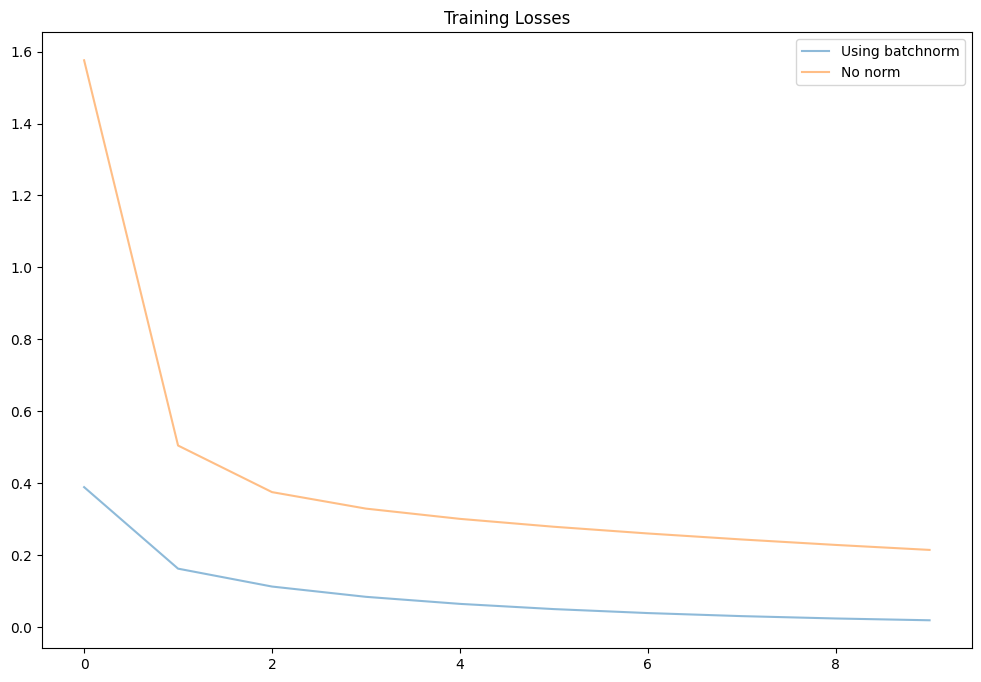

In [ ]:
# compare
fig, ax = plt.subplots(figsize=(12,8))
#losses_batchnorm = np.array(losses_batchnorm)
#losses_no_norm = np.array(losses_no_norm)
plt.plot(losses_batchnorm, label='Using batchnorm', alpha=0.5)
plt.plot(losses_no_norm, label='No norm', alpha=0.5)
plt.title("Training Losses")
plt.legend()

## Testing

In [ ]:
def test(model, train):
    # initialize vars to monitor test loss and accuracy
    class_correct = list(0. for i in range(10))
    class_total = list(0. for i in range(10))
    test_loss = 0.0

    # set model to train or evaluation mode
    # just to see the difference in behavior
    if(train==True):
        model.train()
    if(train==False):
        model.eval()

    # loss criterion
    criterion = nn.CrossEntropyLoss()

    for batch_idx, (data, target) in enumerate(test_loader):
        batch_size = data.size(0)
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss
        test_loss += loss.item()*batch_size
        # convert output probabilities to predicted class
        _, pred = torch.max(output, 1)
        # compare predictions to true label
        correct = np.squeeze(pred.eq(target.data.view_as(pred)))
        # calculate test accuracy for each object class
        for i in range(batch_size):
            label = target.data[i]
            class_correct[label] += correct[i].item()
            class_total[label] += 1

    print('Test Loss: {:.6f}\n'.format(test_loss/len(test_loader.dataset)))

    for i in range(10):
        if class_total[i] > 0:
            print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
                str(i), 100 * class_correct[i] / class_total[i],
                np.sum(class_correct[i]), np.sum(class_total[i])))
        else:
            print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

    print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
        100. * np.sum(class_correct) / np.sum(class_total),
        np.sum(class_correct), np.sum(class_total)))

## Training and Evaluation Model

In [ ]:
# test batchnorm case, in *train* mode
test(net_batchnorm, train=True)

Test Loss: 0.084217

Test Accuracy of     0: 98% (968/980)
Test Accuracy of     1: 99% (1124/1135)
Test Accuracy of     2: 97% (1010/1032)
Test Accuracy of     3: 97% (985/1010)
Test Accuracy of     4: 97% (956/982)
Test Accuracy of     5: 97% (868/892)
Test Accuracy of     6: 96% (929/958)
Test Accuracy of     7: 96% (994/1028)
Test Accuracy of     8: 96% (943/974)
Test Accuracy of     9: 96% (970/1009)

Test Accuracy (Overall): 97% (9747/10000)


In [ ]:
# test batchnorm case, in *evaluation* mode
test(net_batchnorm, train=False)

Test Loss: 0.070575

Test Accuracy of     0: 98% (970/980)
Test Accuracy of     1: 99% (1125/1135)
Test Accuracy of     2: 98% (1015/1032)
Test Accuracy of     3: 97% (985/1010)
Test Accuracy of     4: 97% (958/982)
Test Accuracy of     5: 98% (876/892)
Test Accuracy of     6: 97% (932/958)
Test Accuracy of     7: 97% (998/1028)
Test Accuracy of     8: 96% (938/974)
Test Accuracy of     9: 97% (987/1009)

Test Accuracy (Overall): 97% (9784/10000)


In [ ]:
# for posterity, test no norm case in eval mode
test(net_no_norm, train=False)

Test Loss: 0.206366

Test Accuracy of     0: 98% (964/980)
Test Accuracy of     1: 98% (1114/1135)
Test Accuracy of     2: 90% (938/1032)
Test Accuracy of     3: 93% (942/1010)
Test Accuracy of     4: 93% (921/982)
Test Accuracy of     5: 92% (828/892)
Test Accuracy of     6: 95% (911/958)
Test Accuracy of     7: 92% (951/1028)
Test Accuracy of     8: 91% (890/974)
Test Accuracy of     9: 93% (940/1009)

Test Accuracy (Overall): 93% (9399/10000)
